In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [15]:


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,cast, Date

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
#Convert the date column from a string into a datetime
Date_time = session.query(Measurement.date).all()
Date_time
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date


'2017-08-23'

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

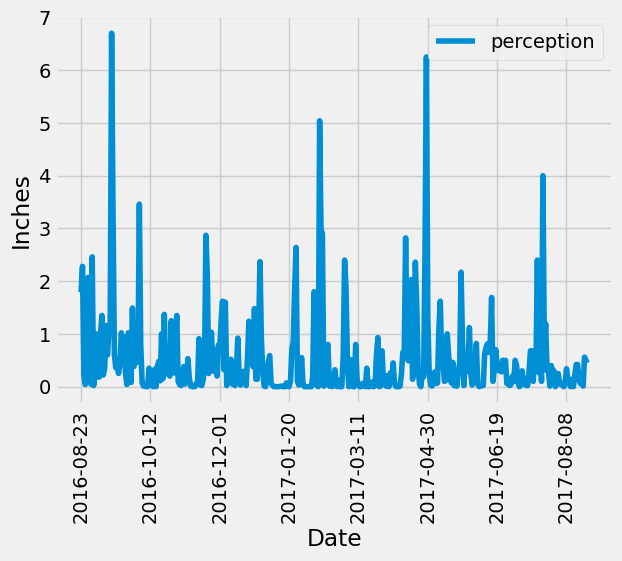

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#converting the date as a string to datetime
most_recent_datetime = datetime.strptime(most_recent_date, '%Y-%m-%d' )


# Calculate the date one year from the last date in data set.
date_12_months_ago = (most_recent_datetime - timedelta(days = 365)).date()

# Perform a query to retrieve the data and precipitation scores
date_perception = session.query(Measurement.date, func.Max(Measurement.prcp)).\
                                filter(Measurement.date >= date_12_months_ago).\
                                group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_perc_df = pd.DataFrame(date_perception, columns=['date', 'perception'])
date_perc_df.set_index('date',inplace=True)
date_perc_df
# Sort the dataframe by date
date_perc_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

date_perc_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
date_perception

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_perception_summary = session.query(Measurement.date, Measurement.prcp).\
                  filter(Measurement.date > date_12_months_ago).all()   
sumary_df = pd.DataFrame(date_perception_summary).dropna()
sumary_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(func.count(func.distinct(Measurement.station))).scalar()
total_station 

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
id = most_active_stations[0].station
max_min_avg = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == id).all()
max_min_avg


[(85.0, 54.0, 71.66378066378067)]

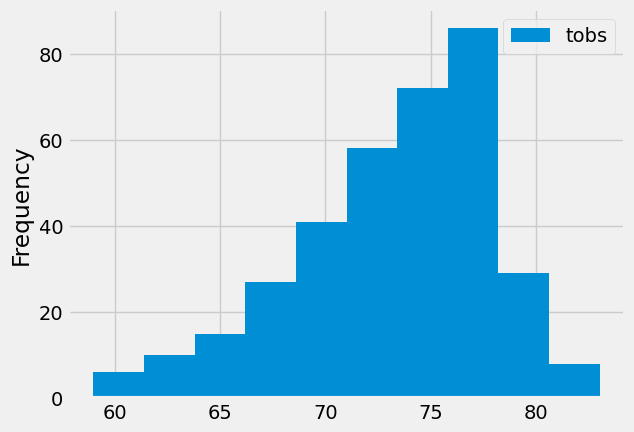

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_Temp= session.query (Measurement.date, Measurement.tobs).\
               filter((func.strftime(Measurement.date) >= date_12_months_ago) & (Measurement.station == id)).all()
               

One_yearTemp_df = pd.DataFrame(one_year_Temp)

One_yearTemp_df.set_index('date', inplace=True)
One_yearTemp_df.plot.hist()
plt.show()

# Close Session

In [19]:
# Close Session
session.close()